In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import rcParams
import celerite
from celerite import terms
from celerite.modeling import Model
import warnings
warnings.filterwarnings('ignore')

import re
import jax.numpy as jnp
from jax import grad, jit, partial
import ticktack
from ticktack import fitting
from astropy.table import Table
from tqdm import tqdm
from jax.ops import index_update
import scipy

rcParams['figure.figsize'] = (8.0, 4.0)

In [2]:
cbm = ticktack.load_presaved_model('Guttler14', production_rate_units = 'atoms/cm^2/s')
cf = fitting.CarbonFitter(cbm)
cf.load_data('inject-recovery.csv')

In [3]:
@jit
def gauss(t):
    start = jnp.nanmin(t)
    end = jnp.nanmax(t)
    mid = start/2+end/2
    prod =  cf.steady_state_production + 0.2 * cf.steady_state_production * jnp.exp(-1/2*((t-775)/3)**2.)
    return prod

@jit
def sine(t, param):
    prod = cf.steady_state_production + 0.18 * cf.steady_state_production * jnp.sin(2 * np.pi / 11 * t)
    return prod

Text(0.5, 1.0, 'Gaussian production rate')

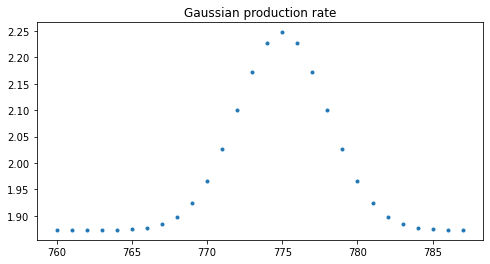

In [4]:
# t = jnp.arange(660, 980)
t = cf.time_data
plt.plot(t, gauss(t), ".")
# plt.plot(t, sine(t, [1]), ".")
plt.title('Gaussian production rate')

In [5]:
cbm1 = ticktack.load_presaved_model('Guttler14', production_rate_units = 'atoms/cm^2/s')
cf1 = fitting.CarbonFitter(cbm1)
cf1.load_data('inject-recovery.csv')
cf1.prepare_function(use_control_points=True)
result = cf1.fit_cp()

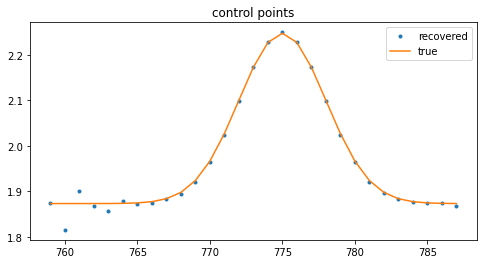

In [6]:
t = np.arange(759, 788)
true_cp = gauss(t)
plt.plot(t, result.x, ".")
plt.plot(t, true_cp)
plt.title("control points");
plt.legend(["recovered", "true"]);

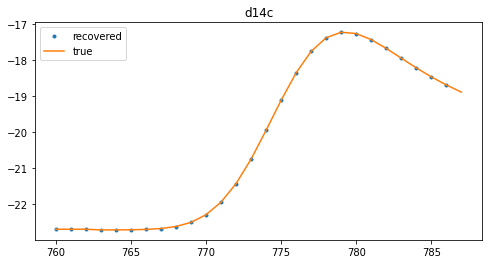

In [7]:
plt.plot(cf1.time_data[:-1], cf1.dc14(result.x), ".")
plt.plot(cf1.time_data, cf1.d14c_data)
plt.legend(["recovered", 'true']);
plt.title("d14c");